# Temel Kütüphanelerin Importu

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi Okuma

In [2]:
df = pd.read_csv('advertising2.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:02,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,NaN,South Manuel,0.0,Iceland,2016-06-03 03:36:18,0.0


# Genel Özet

In [3]:
df.shape

(1008, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1003 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1003 non-null   float64
 3   Daily Internet Usage      1003 non-null   float64
 4   Ad Topic Line             1001 non-null   object 
 5   City                      1003 non-null   object 
 6   Male                      1003 non-null   float64
 7   Country                   1003 non-null   object 
 8   Timestamp                 1003 non-null   object 
 9   Clicked on Ad             1003 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.9+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1003.000000,1001.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,65.001944,35.987013,55011.015444,180.029850,0.481555,0.499501
std,15.859267,8.786628,13401.782565,43.893428,0.499909,0.500249
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,51.340000,29.000000,47095.115000,138.790000,0.000000,0.000000
50%,68.250000,35.000000,57014.840000,183.420000,0.000000,0.000000
75%,78.555000,42.000000,65441.655000,218.795000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


# Data Preprocessing

## Duplicate Control

In [6]:
sum(df.duplicated()) # 7 tane duplicated(tıpatıp aynı veri var.) subset paramesiyle sadece şu sütun değerleri aynı olanları düşür vs. diyebiliyoruz. Hiçbir parametre girmezsek bütün sütunları aynı tamamen duplicated satırları döndürür.

7

In [7]:
df.drop_duplicates(inplace= True) # how parametresi vardır, girilmezse default olarak 'all' dır. inplace parametresiyle kalıcı hale getirebiliriz.

## NaN Control

Nanlarla İlgili 3 Şey yapılabilir.
1) Hiç dokunmadan bırakılabilir.
2) Mantıklı bir şekilde doldurulabilir.
3) Drop edilebilir.

In [8]:
df.isna().sum()

Daily Time Spent on Site    1
Age                         3
Area Income                 1
Daily Internet Usage        1
Ad Topic Line               3
City                        1
Male                        1
Country                     1
Timestamp                   1
Clicked on Ad               1
dtype: int64

In [10]:
df.dropna(how = 'all' , axis = 0 , inplace= True) # how parametresi [all , any] seçeneklerini alabilir. 'all' da tutmak çoğu senaryo için daha mantıklı.

In [11]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:02,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,NaN,South Manuel,0.0,Iceland,2016-06-03 03:36:18,0.0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1.0,Norway,2016-05-19 14:30:17,0.0


In [12]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         2
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               2
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [13]:
df.reset_index(inplace = True, drop= True) # Herhangi bir satır dropladıktan sonra tercihe bağlı genelde yapılan bir index resetleme işlemi

In [14]:
df['Ad Topic Line'].nunique() # Hepsi farklıymış. Bu sütun modele bilgi sağlamaz. Hepsi aynı olsaydı da sağlamazdı. Hepsi farklı kategorik sütun da bilgi sağlamaz.(İstisnalar var time seriesde filan işe yarayabiliyor.)
# Model kurulumunda ve tahmininde bu sütunu hiç kullanmayacağımız için buradaki nan değerleri doldurmakla uğraşmaya gerek yok, düşürücez zaten bu sütunu.

998

In [15]:
df['Age'].nunique() # Sayısal sütunlarda hepsi farklı olabilir. Ama sayısallarda da hepsinin tıpatıp aynı olması gene bilgi sağlamaz.
# Age sütunu bizim için önemli nanlarına bir çözüm bulmalıyız.

43

In [16]:
df[df['Age'].isna()] # Bu 2 Age'i nan olan değere bir çözü bulmalıyız.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:11,0.0
23,41.39,NaN,68962.32,167.22,Exclusive neutral parallelism,Harperborough,0.0,Tokelau,2016-06-13 17:27:09,1.0


NaN Doldurma (Sayısal)
1) Bütün NaN'ları o sütun ortalamasıyla doldurma.
2) İstediğimiz satırları istediğimiz değerlerle manuel doldurma.
3) KNNImputer ile doldurma.
4) Eksik değerleri doldurmak için model kurma.

In [17]:
round(df['Age'].mean()) # Age sütununun ortalamasına baktık.

36

In [18]:
df['Age'].fillna(round(df['Age'].mean()) , inplace= True) # O 2 nan'ı Age sütununun ortalamasıyla yani üstte bulduğumuz 36 ile doldurduk.

In [19]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,36.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:02,0.0
2,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:19,0.0
3,68.37,35.0,73889.99,225.58,NaN,South Manuel,0.0,Iceland,2016-06-03 03:36:18,0.0
4,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1.0,Norway,2016-05-19 14:30:17,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             998 non-null    object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   float64
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.2+ KB


# EDA

In [21]:
# Soru: Ülkelere göre ortalama internet kullanımı en fazla olan ilk 5 ülke
df.groupby('Country')['Daily Internet Usage'].mean().sort_values(ascending=False).head()

Country
Mozambique    248.230000
Malaysia      242.306667
Uzbekistan    241.750000
Bermuda       239.940000
India         235.705000
Name: Daily Internet Usage, dtype: float64

<Axes: xlabel='Country'>

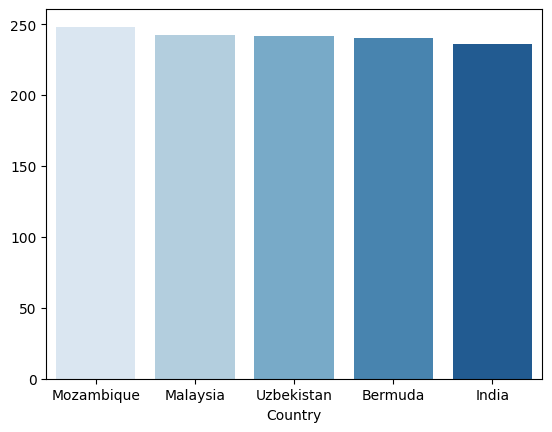

In [22]:
top_5 = df.groupby('Country')['Daily Internet Usage'].mean().sort_values(ascending=False).head()
sns.barplot(x = top_5.index, y = top_5.values, palette = 'Blues'  )

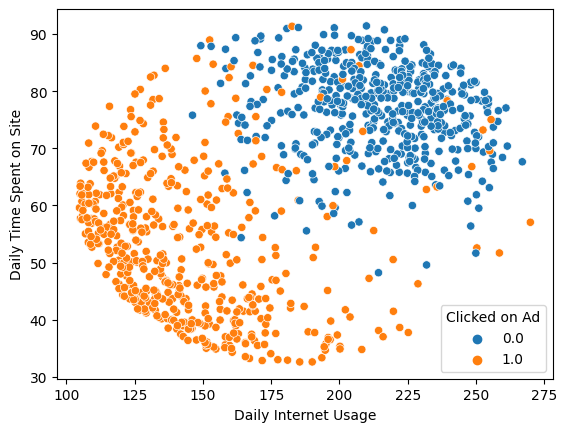

In [23]:
# Soru2: Gelire göre günlük internet kullanımı nasıl değişiyor ?
sns.scatterplot(x = df['Daily Internet Usage'] , y = df['Daily Time Spent on Site'], hue=df['Clicked on Ad']);

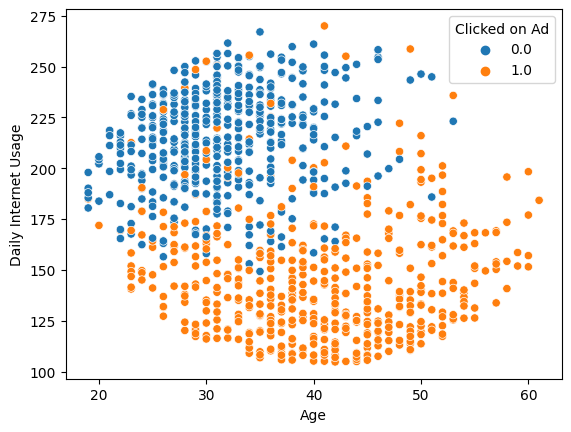

In [24]:
# Soru3: Yaşa göre günlük internet kullanımı nasıl değişiyor ?
sns.scatterplot(x = df['Age'] , y = df['Daily Internet Usage'] , hue=df['Clicked on Ad']);

İnternette az zaman geçirenler reklamlara daha çok tıklıyor

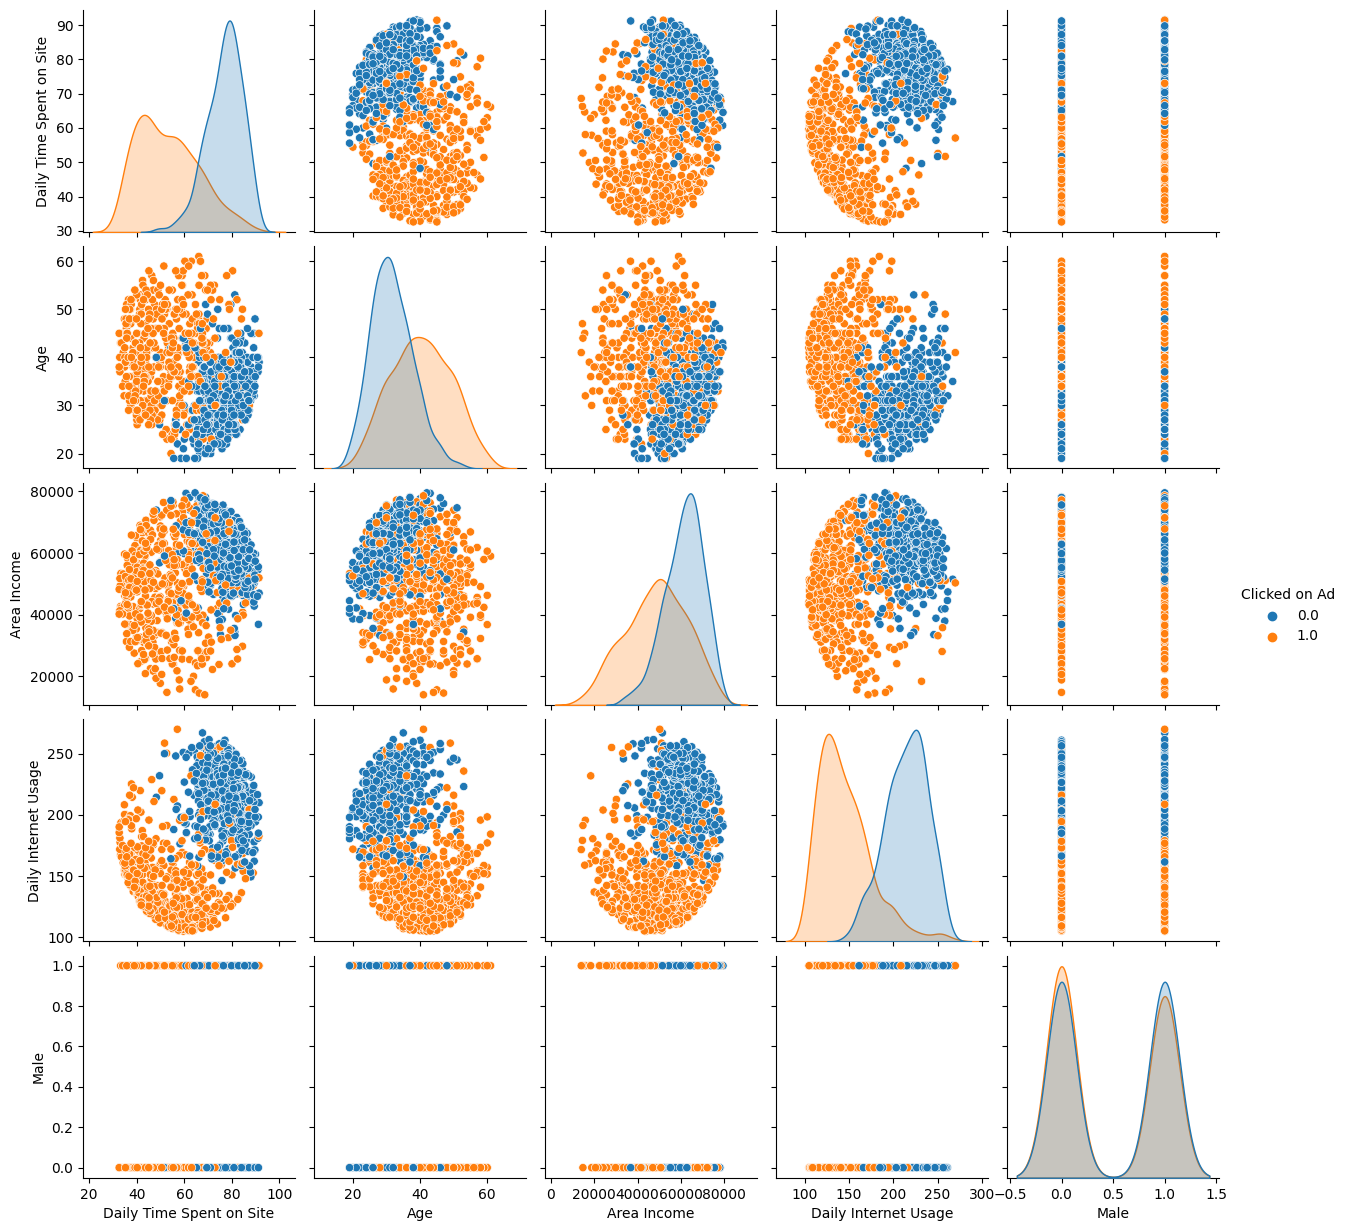

In [25]:
sns.pairplot(df , hue= 'Clicked on Ad');

Nispeten güzel sayılabilecek ayrışmalar var. İyi bir sonuç almayı bekliyoruz.

# Modelling

### Train | Test Split

In [26]:
X = df[['Daily Time Spent on Site' , 'Age' , 'Area Income' , 'Daily Internet Usage' , 'Male']] # Country şüpheli, belki alınabilir. Timestamp belki yıl ve ay bilgisi çekilebilir. # Özellikler
y = df['Clicked on Ad'] # Hedef Değişken

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 34)

### Model

#### LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.885
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       105
         1.0       0.89      0.86      0.88        95

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



#### XGBoost

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('XGB')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGB
0.96
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       105
         1.0       0.97      0.95      0.96        95

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



#### LGBM

In [30]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print('LGBM')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

LGBM
0.955
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       105
         1.0       0.98      0.93      0.95        95

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



#### CatBoost

In [31]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose=0)

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)

print('CatBoost')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

CatBoost
0.965
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       105
         1.0       0.98      0.95      0.96        95

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



# Hiper Parametre Optimizasyonu

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### CatBoost GridSearchCV

In [33]:
cb = CatBoostClassifier(verbose=0)
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1],
    'depth': [2,3 ,5 , 7 , 9],
}

grid_cb = GridSearchCV(cb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_cb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001CA26709B40>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 5, 7, 9],
                         'iterations': [500, 1000, 1500],
                         'learning_rate': [0.01, 0.1]},
             scoring='accuracy')

In [34]:
grid_cb.best_params_

{'depth': 3, 'iterations': 1500, 'learning_rate': 0.01}

In [35]:
grid_cb.best_score_

0.9662500000000002

In [36]:
# CatBoost'un original Grid Search'ı

cb = CatBoostClassifier(verbose=0)
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1],
    'depth': [2,3 ,5 , 7 , 9],
}

grid_cb = cb.grid_search(param_grid, X_train, y_train, cv=5, plot=False)
grid_cb


bestTest = 0.09971928281
bestIteration = 499

0:	loss: 0.0997193	best: 0.0997193 (0)	total: 424ms	remaining: 12.3s

bestTest = 0.09615774905
bestIteration = 71

1:	loss: 0.0961577	best: 0.0961577 (1)	total: 803ms	remaining: 11.2s

bestTest = 0.0955242314
bestIteration = 766

2:	loss: 0.0955242	best: 0.0955242 (2)	total: 1.58s	remaining: 14.2s

bestTest = 0.09615774905
bestIteration = 71

3:	loss: 0.0961577	best: 0.0955242 (2)	total: 2.45s	remaining: 15.9s

bestTest = 0.0944787236
bestIteration = 1480

4:	loss: 0.0944787	best: 0.0944787 (4)	total: 3.61s	remaining: 18.1s

bestTest = 0.09615774905
bestIteration = 71

5:	loss: 0.0961577	best: 0.0944787 (4)	total: 4.8s	remaining: 19.2s

bestTest = 0.09811295525
bestIteration = 497

6:	loss: 0.0981130	best: 0.0944787 (4)	total: 5.23s	remaining: 17.2s

bestTest = 0.09452911967
bestIteration = 83

7:	loss: 0.0945291	best: 0.0944787 (4)	total: 5.67s	remaining: 15.6s

bestTest = 0.09394244673
bestIteration = 995

8:	loss: 0.0939424	best: 0.0939

{'params': {'depth': 3, 'iterations': 1500, 'learning_rate': 0.01},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
  

### CatBoost RandomizedSearchCV

In [37]:
cb = CatBoostClassifier(verbose=0)
param_dist = {
    'iterations': [500, 1000, 1500, 2500 , 4000 , 5000, 7500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2 , 0.3],
    'depth': [2,3 ,5, 6 , 7 , 9 , 11],
}

random_cb = RandomizedSearchCV(cb, param_dist, cv=5, n_iter= 20, scoring='accuracy', n_jobs=-1)
random_cb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001CA27BED960>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': [2, 3, 5, 6, 7, 9, 11],
                                        'iterations': [500, 1000, 1500, 2500,
                                                       4000, 5000, 7500],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3]},
                   scoring='accuracy')

In [38]:
random_cb.best_params_

{'learning_rate': 0.01, 'iterations': 1500, 'depth': 3}

In [39]:
random_cb.best_score_

0.9662500000000002

In [40]:
# CatBoostun original Randomized Search'ü

cb = CatBoostClassifier(verbose=0)
param_dist = {
    'iterations': [500, 1000, 1500, 2500 , 4000 , 5000, 7500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2 , 0.3],
    'depth': [2,3 ,5, 6 , 7 , 9 , 11],
}

random_cb = cb.randomized_search(param_dist, X_train, y_train, cv=3,  n_iter=20, verbose=True)
random_cb


bestTest = 0.102682602
bestIteration = 32

0:	loss: 0.1026826	best: 0.1026826 (0)	total: 3.15s	remaining: 60s

bestTest = 0.102682602
bestIteration = 32

1:	loss: 0.1026826	best: 0.1026826 (0)	total: 7.8s	remaining: 1m 10s

bestTest = 0.09811295525
bestIteration = 497

2:	loss: 0.0981130	best: 0.0981130 (2)	total: 10.1s	remaining: 57.4s

bestTest = 0.09827007825
bestIteration = 26

3:	loss: 0.0982701	best: 0.0981130 (2)	total: 13.9s	remaining: 55.6s

bestTest = 0.09827007825
bestIteration = 26

4:	loss: 0.0982701	best: 0.0981130 (2)	total: 19.3s	remaining: 58s

bestTest = 0.09183449421
bestIteration = 1709

5:	loss: 0.0918345	best: 0.0918345 (5)	total: 30.3s	remaining: 1m 10s

bestTest = 0.0887765855
bestIteration = 17

6:	loss: 0.0887766	best: 0.0887766 (6)	total: 38.2s	remaining: 1m 10s

bestTest = 0.1068427626
bestIteration = 33

7:	loss: 0.1068428	best: 0.0887766 (6)	total: 44.2s	remaining: 1m 6s

bestTest = 0.1049160516
bestIteration = 133

8:	loss: 0.1049161	best: 0.0887766 (6)	

{'params': {'depth': 5, 'iterations': 1500, 'learning_rate': 0.3},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

### XGBoost GridSearchCV

In [41]:
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 300, 500 , 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_grid = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='accuracy')

In [42]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

In [43]:
xgb_grid.best_score_

0.95375

### XGBoost RandomSearchCV

In [44]:
xgb = XGBClassifier()
param_dist = {
    'n_estimators': [100, 300, 500 , 1000, 2000 ,3000 , 5000],
    'max_depth': [2,3, 5, 7, 9],
    'learning_rate': [0.3 , 0.2 , 0.1, 0.01, 0.001]
}

xgb_random = RandomizedSearchCV(xgb, param_dist, scoring='accuracy', n_iter = 20, cv=5, n_jobs=-1)

xgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.3, 0.2, 0.1, 0.01,
                                                          0.001],
                                        'max_depth': [2, 3, 5, 7, 9],
                                        'n_estimators': [100, 300, 500, 1000,
                                                         2000, 3000, 5000]},
                   scoring='accuracy')

In [45]:
xgb_random.best_params_

{'n_estimators': 3000, 'max_depth': 3, 'learning_rate': 0.001}

In [46]:
xgb_random.best_score_

0.95375

# Final Model

In [49]:
# En iyi model ve parametreleri bulup belirlendikten sonra sadece X_train ve y_train ile değil tüm data ile yani X ve y ile son final_modelimizi oluştururuz.

final_model = CatBoostClassifier(**{'learning_rate': 0.01, 'iterations': 1500, 'depth': 3})

final_model.fit(X, y)

0:	learn: 0.6802802	total: 847us	remaining: 1.27s
1:	learn: 0.6636837	total: 1.67ms	remaining: 1.25s
2:	learn: 0.6493812	total: 2.66ms	remaining: 1.32s
3:	learn: 0.6356664	total: 3.59ms	remaining: 1.34s
4:	learn: 0.6204001	total: 4.31ms	remaining: 1.29s
5:	learn: 0.6071078	total: 5.29ms	remaining: 1.32s
6:	learn: 0.5932981	total: 6.12ms	remaining: 1.3s
7:	learn: 0.5803248	total: 6.91ms	remaining: 1.29s
8:	learn: 0.5685427	total: 7.69ms	remaining: 1.27s
9:	learn: 0.5551754	total: 8.62ms	remaining: 1.28s
10:	learn: 0.5443895	total: 9.77ms	remaining: 1.32s
11:	learn: 0.5321510	total: 10.7ms	remaining: 1.33s
12:	learn: 0.5208136	total: 11.6ms	remaining: 1.32s
13:	learn: 0.5109182	total: 12.4ms	remaining: 1.32s
14:	learn: 0.5005533	total: 13.4ms	remaining: 1.33s
15:	learn: 0.4919730	total: 14.4ms	remaining: 1.33s
16:	learn: 0.4825241	total: 15.3ms	remaining: 1.33s
17:	learn: 0.4734496	total: 16.5ms	remaining: 1.36s
18:	learn: 0.4645948	total: 17.6ms	remaining: 1.37s
19:	learn: 0.4550089	tot

In [65]:
final_model.feature_importances_

array([32.6032954 , 10.81586967, 12.00500785, 43.69680137,  0.87902573])

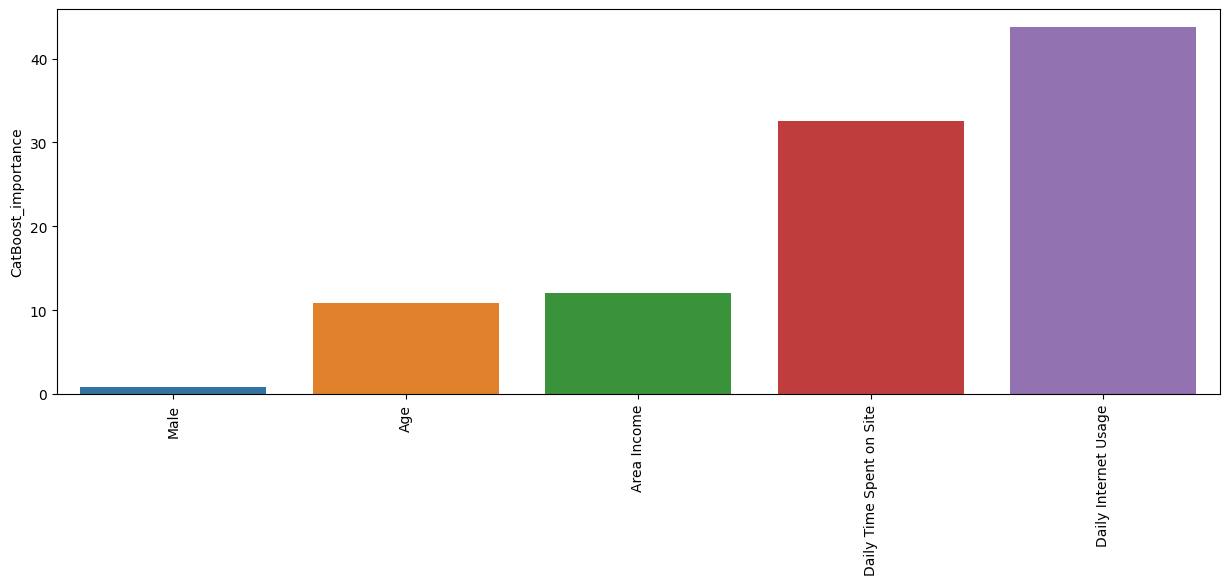

In [69]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['CatBoost_importance'])
xgb_imp_feats = feats.sort_values("CatBoost_importance")


plt.figure(figsize=(15,5))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='CatBoost_importance')

plt.xticks(rotation=90);

In [50]:
import joblib

joblib.dump(final_model , 'final_model.pkl') # Final modelimizi kaydederiz, ileride başka yerlerde de kullanmak için.

['final_model.pkl']

In [ ]:
# pass

In [51]:
model = joblib.load('final_model.pkl') # İleride bu şekilde modelimizi yükleyebiliriz.

In [75]:
model.predict([90, 50, 50000, 200, 1]) # Tekil tahmin.

0.0

In [ ]:
# Done.